In [156]:
import json
import pandas as pd
import seaborn as sns
from datetime import datetime, timezone
import numpy as np

# Load and clean data
with open("firestore-backup.json", "r") as file:
    data = json.load(file)

# load the tables into dataframes
raw_pddls = data['pddls']
pddls = pd.DataFrame(raw_pddls)
raw_performance =data["performance"]
performance = pd.DataFrame(raw_performance)
raw_prompts = data["prompts"]
prompts = pd.DataFrame(raw_prompts)
raw_sessions = data["sessions"]
sessions = pd.DataFrame(raw_sessions)
raw_users=data["users"]
users = pd.DataFrame(raw_users)

print(performance.info())








<class 'pandas.core.frame.DataFrame'>
RangeIndex: 238 entries, 0 to 237
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   id                        238 non-null    object
 1   promptId                  238 non-null    object
 2   zeroShotTime              238 non-null    int64 
 3   promptEngineeringTime     238 non-null    int64 
 4   pddlPlannerTime           238 non-null    int64 
 5   zeroShotFailure           238 non-null    bool  
 6   promptEngineeringFailure  238 non-null    bool  
 7   pddlPlannerFailure        238 non-null    bool  
 8   zeroShotError             19 non-null     object
 9   promptEngineeringError    19 non-null     object
 10  pddlPlannerError          1 non-null      object
 11  timestamp                 238 non-null    object
 12  user_id                   118 non-null    object
dtypes: bool(3), int64(3), object(7)
memory usage: 19.4+ KB
None


In [37]:
feedback = pd.read_excel("feedback.xlsx")
feedback.info()



np.float64(3.902439024390244)

In [55]:
#Best performing workflow
best_workflow = feedback['best_study'].mode()
print(best_workflow)

0     Myrmidon
Name: best_study, dtype: object


In [102]:
#Get a better idea of the spread and center of the data
feedback.describe()

,ID,Start time,Completion time,Name,troy_realistic,troy_satisfied,troy_understand,troy_follow,troy_align,troy_better,...,ithaca_understand,ithaca_follow,ithaca_align,ithaca_better,myrmidon_realistic,myrmidon_satisfied,myrmidon_understand,myrmidon_follow,myrmidon_align,myrmidon_better
count,41.000000,41,41,0.0,41.000000,41.000000,41.000000,41.000000,40.000000,40.000000,...,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000
mean,27.000000,2025-03-24 09:39:43.878048768,2025-03-24 09:52:10.975609856,NaN,3.902439,3.682927,4.024390,3.585366,3.550000,3.400000,...,3.097561,2.414634,2.463415,2.341463,4.195122,4.024390,4.146341,3.951220,3.975610,3.609756
min,7.000000,2025-03-22 13:33:57,2025-03-22 13:36:06,NaN,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,2.000000,2.000000,2.000000,1.000000,2.000000,1.000000
25%,17.000000,2025-03-23 15:05:01,2025-03-23 15:16:51,NaN,4.000000,3.000000,4.000000,3.000000,3.000000,2.750000,...,2.000000,1.000000,1.000000,1.000000,4.000000,4.000000,4.000000,4.000000,4.000000,3.000000
50%,27.000000,2025-03-23 21:49:52,2025-03-23 21:55:23,NaN,4.000000,4.000000,4.000000,4.000000,4.000000,3.500000,...,3.000000,2.000000,3.000000,2.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000
75%,37.000000,2025-03-24 13:34:29,2025-03-24 13:44:02,NaN,5.000000,4.000000,5.000000,4.000000,4.000000,4.250000,...,4.000000,3.000000,4.000000,3.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000
max,47.000000,2025-03-30 02:11:05,2025-03-30 02:19:46,NaN,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,...,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000
std,11.979149,NaN,NaN,NaN,1.019923,1.127808,1.012122,1.117488,1.131144,1.296939,...,1.374861,1.341186,1.286421,1.334349,0.813004,0.961452,0.882071,0.947397,0.907959,1.282148


In [167]:
import matplotlib.pyplot as plt
import numpy as np

# Metrics (x-axis labels)
metrics = ['Realistic', 'Satisfied', 'Follow', 'Understand', 'Better', 'Align']

# Mean values for each workflow
troy_means = [
    feedback['troy_realistic'].mean(),
    feedback['troy_satisfied'].mean(),
    feedback['troy_follow'].mean(),
    feedback['troy_understand'].mean(),
    feedback['troy_better'].mean(),
    feedback['troy_align'].mean()
]

ithaca_means = [
    feedback['ithaca_realistic'].mean(),
    feedback['ithaca_satisfied'].mean(),
    feedback['ithaca_follow'].mean(),
    feedback['ithaca_understand'].mean(),
    feedback['ithaca_better'].mean(),
    feedback['ithaca_align'].mean()
]

myrmidon_means = [
    feedback['myrmidon_realistic'].mean(),
    feedback['myrmidon_satisfied'].mean(),
    feedback['myrmidon_follow'].mean(),
    feedback['myrmidon_understand'].mean(),
    feedback['myrmidon_better'].mean(),
    feedback['myrmidon_align'].mean()
]


print(myrmidon_means)   



[np.float64(4.195121951219512), np.float64(4.024390243902439), np.float64(3.951219512195122), np.float64(4.146341463414634), np.float64(3.6097560975609757), np.float64(3.975609756097561)]


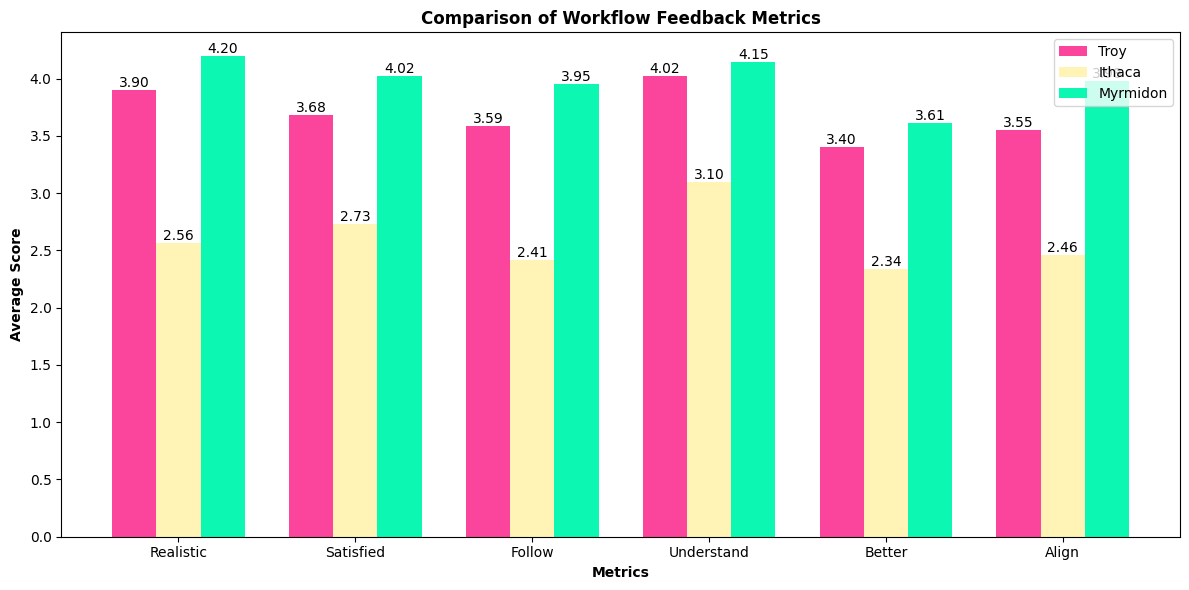

In [109]:
# Set width of bars
bar_width = 0.25
x = np.arange(len(metrics))  # x-axis positions

# Create bars
plt.figure(figsize=(12, 6))
plt.bar(x - bar_width, troy_means, width=bar_width, label='Troy', color='#fb449c')
plt.bar(x, ithaca_means, width=bar_width, label='Ithaca', color='#fff4b6')
plt.bar(x + bar_width, myrmidon_means, width=bar_width, label='Myrmidon', color='#0cf7b2')

# Customize the plot
plt.xlabel('Metrics', fontweight='bold')
plt.ylabel('Average Score', fontweight='bold')
plt.title('Comparison of Workflow Feedback Metrics', fontweight='bold')
plt.xticks(x, metrics)
plt.legend()

# Add value labels on top of bars
for i in range(len(metrics)):
    plt.text(x[i] - bar_width, troy_means[i], f'{troy_means[i]:.2f}', ha='center', va='bottom')
    plt.text(x[i], ithaca_means[i], f'{ithaca_means[i]:.2f}', ha='center', va='bottom')
    plt.text(x[i] + bar_width, myrmidon_means[i], f'{myrmidon_means[i]:.2f}', ha='center', va='bottom')

plt.tight_layout()
plt.savefig('performance2.png', transparent=True)
plt.show()

In [64]:
#Analyse workflow performance 

#Count failures
print("PDDL-Planner: ", performance['pddlPlannerTime'].mean())
print("Zero-shot: ", performance['zeroShotTime'].mean())
print("Prompt-Engineering: ", performance['promptEngineeringTime'].mean())

PDDL-Planner:  3734.6428571428573
Zero-shot:  2402.9327731092435
Prompt-Engineering:  2872.294117647059


In [100]:
#Limit these to just the ones with user id

# print(performance.describe())
print((performance['zeroShotFailure'] == True).sum())
print((performance.count()))


19
id                          238
promptId                    238
zeroShotTime                238
promptEngineeringTime       238
pddlPlannerTime             238
zeroShotFailure             238
promptEngineeringFailure    238
pddlPlannerFailure          238
zeroShotError                19
promptEngineeringError       19
pddlPlannerError              1
timestamp                   238
user_id                     118
dtype: int64


In [85]:
#Get relevant preformance metrics
# print(feedback.info)
feedback.rename(columns={'UID':'user_id'}, inplace=True)
# print(feedback.info)
relevant_performance = performance.merge(feedback, on="user_id", how="inner")[performance.columns]
relevant_performance.head()

,id,promptId,zeroShotTime,promptEngineeringTime,pddlPlannerTime,zeroShotFailure,promptEngineeringFailure,pddlPlannerFailure,zeroShotError,promptEngineeringError,pddlPlannerError,timestamp,user_id
0,43b4FH4Pk2BDQM7K2hv5,uMvcBf5MslSgqSd33dXU,3257,3257,3858,False,False,False,None,None,None,"{'_seconds': 1742899129, '_nanoseconds': 18500...",91dc5MdkvZRjf3slffsTYhLlaZh2
1,4F7vdiU3MpXfqkFtCRua,lWvPczFUh3ZvqECBWmjs,3357,3357,3709,False,False,False,None,None,None,"{'_seconds': 1742926743, '_nanoseconds': 13700...",0J953KNM33fqWoKrOHJi6gyk31w2
2,4ZSzxRF3bWizS1bi7Sf7,Zm5lHsw5dwkgvMAAqGJs,3357,3357,3818,False,False,False,None,None,None,"{'_seconds': 1742924428, '_nanoseconds': 41000...",8ZNXVjxLGiPSvVIZxSdTnlTRD3n2
3,4vHuCtqTyZtBEWFVpc82,GzEiAd8YFTdIzw4Q6mHd,1096,3515,3926,False,False,False,None,None,None,"{'_seconds': 1742753057, '_nanoseconds': 41600...",PrhCcnUNhMdhVtNiBp1FV8G95io2
4,5YazaANxWheblpbYM6Xi,QwN2YnriNlZq0NVBR1C7,3156,3157,3758,False,False,False,None,None,None,"{'_seconds': 1742770341, '_nanoseconds': 53600...",6foKj5lY43MPPUQkJc8oy9QI2g52


In [111]:
#Further performance evaluation
print(relevant_performance.describe())

       zeroShotTime  promptEngineeringTime  pddlPlannerTime
count     77.000000              77.000000         77.00000
mean    2790.779221            3157.974026       3872.87013
std      990.011266             517.108076        822.39892
min      873.000000            1626.000000       1490.00000
25%     2171.000000            3138.000000       3686.00000
50%     3255.000000            3300.000000       3758.00000
75%     3388.000000            3387.000000       4002.00000
max     4398.000000            4399.000000       7161.00000


/var/folders/xk/jx1k7lgd5qv326t732s3jm6w0000gn/T/ipykernel_30850/2368845121.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="workflow", y="time", data=time_performance, palette=cutesie_pallete)


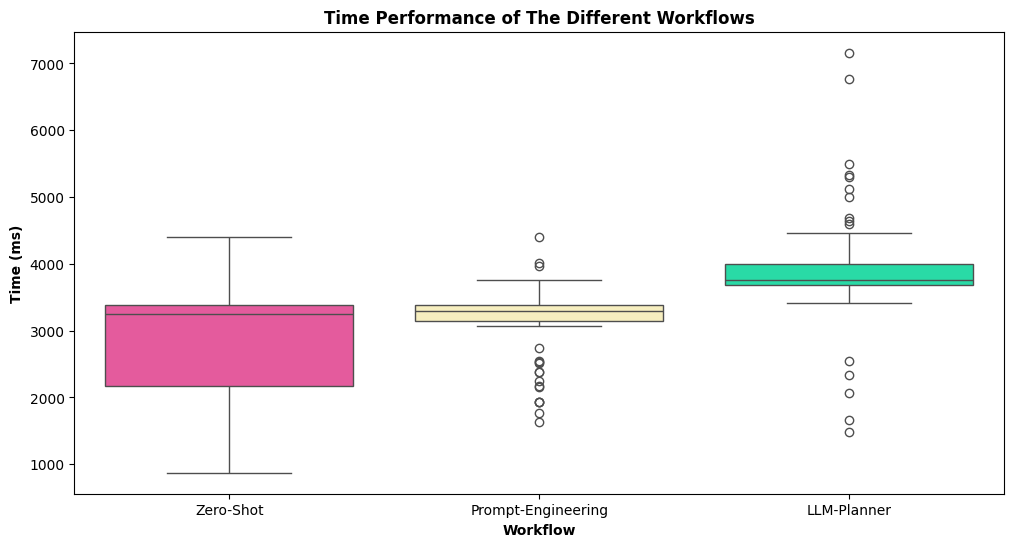

,Zero-Shot,Prompt-Engineering,LLM-Planner
count,77.000000,77.000000,77.00000
mean,2790.779221,3157.974026,3872.87013
std,990.011266,517.108076,822.39892
min,873.000000,1626.000000,1490.00000
25%,2171.000000,3138.000000,3686.00000
50%,3255.000000,3300.000000,3758.00000
75%,3388.000000,3387.000000,4002.00000
max,4398.000000,4399.000000,7161.00000


In [147]:
#Boxplots for the different workflow performance (time)
# Make a dataframe of time performance data 
time_performance_raw = relevant_performance[['zeroShotTime', 'promptEngineeringTime','pddlPlannerTime']]
time_performance_raw= time_performance_raw.rename(columns={'zeroShotTime':'Zero-Shot', 'promptEngineeringTime':'Prompt-Engineering', 'pddlPlannerTime':'LLM-Planner'})


# melt 
time_performance = time_performance_raw.melt(var_name='workflow', value_name='time')


cutesie_pallete = ['#fb449c', '#fff4b6', '#0cf7b2']

# Create the boxplot
plt.figure(figsize=(12, 6))
sns.boxplot(x="workflow", y="time", data=time_performance, palette=cutesie_pallete)

plt.title("Time Performance of The Different Workflows" , fontweight='bold')
plt.xlabel('Workflow', fontweight='bold')
plt.ylabel('Time (ms)', fontweight='bold')  
plt.show()

# print
time_performance_raw.describe()


In [101]:
zero_shot_error = relevant_performance['zeroShotFailure'].sum()
prompt_engineering_error = relevant_performance['promptEngineeringFailure'].sum()
pddl_planner_error = relevant_performance['pddlPlannerError'].sum()  
print(zero_shot_error)
print(prompt_engineering_error)
print(pddl_planner_error)


# relevant_performance.head()

0
0
0
0
0
0


In [162]:
# Check if there was really no error throughout the experiment. Especially for the LLM-Planner
# Function to convert Firestore timestamp format to datetime

# Function to convert Firestore timestamp format to Pandas datetime
def convert_time(timestamp):
    if isinstance(timestamp, dict) and '_seconds' in timestamp:
        return pd.to_datetime(timestamp['_seconds'], unit='s')
    return timestamp  # it's already a Timestamp or NaT

        
   
# Convert the 'timestamp' column to Pandas datetime format
performance['timestamp'] = performance['timestamp'].apply(convert_time)

# Define the filtering start time and ensure it's in the correct format
start_time = pd.to_datetime("2025-03-22").tz_localize(None)

# Filter the DataFrame
filtered_data = performance[performance['timestamp'] >= start_time]


# Display filtered results
print(filtered_data['pddlPlannerFailure'].value_counts())
print(filtered_data.shape)

pddlPlannerFailure
False    103
Name: count, dtype: int64
(103, 13)


In [175]:
#Get a sample input-output for the report

relevant_prompts = prompts.merge(feedback, on="user_id", how="inner")[prompts.columns]
relevant_prompts.head(77)

,id,prompt,zeroShotResponse,promptEngineeringResponse,pddlPlannerResponse,timestamp,user_id,plannerPlan
0,0VVtQ3RQxe1W9sbLrazD,I am studying for my big data management test ...,I'd be happy to help you create a study plan f...,Here's a 7-day study plan to help you prepare ...,Here is your study plan:\n\nDay 1:\n- Study SP...,"{'_seconds': 1742775007, '_nanoseconds': 85000...",IKxrKdMyfQb6PxtYpDIxdHmVBbe2,study sparql-syntax day1\nstudy sparql-query d...
1,0nIsD5rMi54FL0EKSPVU,I’d like emotional intelligence and its releva...,"Here's a study plan for the topic ""Emotional I...",Here is a study plan that incorporates the eff...,Here is the converted study plan:\n\nDay 1:\n-...,"{'_seconds': 1742735165, '_nanoseconds': 93200...",4nNCEwYaz2Tu7ycgDnaZgt1EAc63,study social-skills day1\nstudy self-awareness...
2,2MYc8mDRWvl09f4YXmkT,try again.\nI am studying Media and communicat...,I'd be happy to help you create a study plan t...,"Here's a tailored study plan for you, incorpor...",Here is your study plan in natural language:\n...,"{'_seconds': 1742762600, '_nanoseconds': 23200...",6foKj5lY43MPPUQkJc8oy9QI2g52,practice public-speaking day1\nstudy media-the...
3,2MYc8mDRWvl09f4YXmkT,try again.\nI am studying Media and communicat...,I'd be happy to help you create a study plan t...,"Here's a tailored study plan for you, incorpor...",Here is your study plan in natural language:\n...,"{'_seconds': 1742762600, '_nanoseconds': 23200...",6foKj5lY43MPPUQkJc8oy9QI2g52,practice public-speaking day1\nstudy media-the...
4,2MYc8mDRWvl09f4YXmkT,try again.\nI am studying Media and communicat...,I'd be happy to help you create a study plan t...,"Here's a tailored study plan for you, incorpor...",Here is your study plan in natural language:\n...,"{'_seconds': 1742762600, '_nanoseconds': 23200...",6foKj5lY43MPPUQkJc8oy9QI2g52,practice public-speaking day1\nstudy media-the...
...,...,...,...,...,...,...,...,...
72,xRhmoriYLg8EdZ9DxPu5,thank you,You're welcome! Here is a suggested study plan...,Here is a comprehensive study plan that incorp...,Here is your study plan in natural language:\n...,"{'_seconds': 1742769813, '_nanoseconds': 78200...",Jai7t3fprZSse1a5gFSYw8O27b43,engage digital-literacy day1\nengage digital-e...
73,yL8zAqfczdkXXKXdNf7g,hi! I am a DBA student. I have four courses to...,Hello there! I'd be happy to help you create a...,Here's a tailored study plan to help you prepa...,Here is a suggested study plan for you:\n\nDay...,"{'_seconds': 1742746164, '_nanoseconds': 46000...",aTMDbJZtJYWwT0AAZCfyavw5uKV2,study seminar-sbm day1\nstudy doctoral-seminar...
74,zvDOPwf7KE0SxhsbB1zX,I am studying Media and Communication. I don’t...,"Hello! I'm Athena, your AI assistant. I unders...","Here's a tailored study plan for you, taking i...",Here is your study plan:\n\nDay 1: Study media...,"{'_seconds': 1742761621, '_nanoseconds': 39000...",6foKj5lY43MPPUQkJc8oy9QI2g52,study media-theory day1\npractice-speaking med...
75,zvDOPwf7KE0SxhsbB1zX,I am studying Media and Communication. I don’t...,"Hello! I'm Athena, your AI assistant. I unders...","Here's a tailored study plan for you, taking i...",Here is your study plan:\n\nDay 1: Study media...,"{'_seconds': 1742761621, '_nanoseconds': 39000...",6foKj5lY43MPPUQkJc8oy9QI2g52,study media-theory day1\npractice-speaking med...


In [181]:
#Find PDDL generated for the selected prompt
pddls_to_use = pddls[pddls['promptId']=='545wbDYKHj2xYUGU4VWY']
# pddls_to_use.head()
error_plan = pddls[pddls['promptId']=='8BaOLevojhuofMeBjIQH']
error_plan.head()

,id,user_id,promptId,domainPddl,problemPddl
125,csVrBxfoNbO5v9QfDgKK,fsKuW195dEMpE25gTfLMPtcjbI33,8BaOLevojhuofMeBjIQH,(define (domain data-structures-study)\n (:re...,(define (problem data-structures-study-plan)\n...


In [205]:
#Investigate PDDLs
pddls.head(60)

,id,user_id,promptId,domainPddl,problemPddl
0,03jg6uZ0TkgEnVLqICYK,6foKj5lY43MPPUQkJc8oy9QI2g52,ovkc7c3GCCneFcZ4Gdip,(define (domain media-study-planning)\n (:req...,(define (problem media-study-plan)\n (:domain...
1,08Y47iQUjMTduOJC4I69,NaN,9y9YCQojNEKiFzkxPE6x,(define (domain geometry-study)\n (:requireme...,(define (problem geometry-exam-study-plan)\n ...
2,0Dqmz63r5z4NJkxPMw80,WA04rOPdjhTcxrP8Uz3LRwqo71o1,eqm4UQamAtm9S6DlD308,(define (domain water-food-health-nexus)\n (:...,(define (problem urban-water-food-health-nexus...
3,0aHgTeJx0KVlRnRE137B,NaN,zb4j8XTMrOGbMCXQ3JTR,(define (domain study-planning)\n (:requireme...,(define (problem geometry-study-plan)\n (:dom...
4,0fMlD1jAEdxtRcZwgIzF,NaN,UfMl86YsEYH6AHifKM99,(define (domain geometry-study)\n (:requireme...,(define (problem geometry-study-plan)\n (:dom...
5,1ir5YqLgKkgH0hBBiKJs,6foKj5lY43MPPUQkJc8oy9QI2g52,T4Tj8EJ1RB10bL2B2ZWV,(define (domain media-study-planning)\n (:req...,(define (problem media-study-plan)\n (:domain...
6,2UkEyh0tK1YAXq6dRPeq,NaN,jLiz4MjZDkmkrRPcuBdb,(define (domain geometry-study)\n (:requireme...,(define (problem geometry-study-plan)\n (:dom...
7,2pkU2Q0AiZ5lExwWUVTo,uXJjxjxe35Mvhxy54TTtElCUteC3,II7Df1CFk55IDX5pSiYq,(define (domain llm-study-planning)\n (:requi...,(define (problem llm-study-plan)\n (:domain l...
8,2psqlwlMly7e89oSwn7N,l1k77DC7UuavrnY2cBAFRSBnECJ2,Sf6UcytfKuU9hkEpAADk,(define (domain motherhood-journey)\n (:requi...,(define (problem ebook-project)\n (:domain mo...
9,3Klmi0UB5iLOXspIVANY,NaN,rbEbC5V6KGgAsDf9yJCR,(define (domain geometry-study-planning)\n (:...,(define (problem geometry-exam-study-plan)\n ...


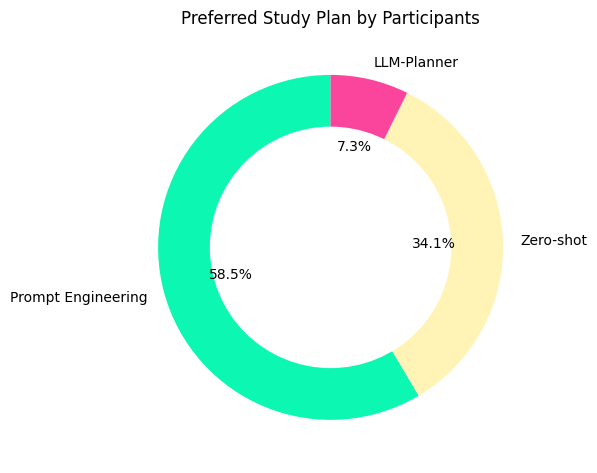

In [204]:
# Get value counts
best_counts = feedback['best_study'].value_counts()

# Mapping of original labels to new labels
label_map = {
    'Troy': 'Zero-shot',
    'Ithaca': 'LLM-Planner',
    'Myrmidon': 'Prompt Engineering'
}

# Choose custom colors (same as before)
custom_colors = {
    'Troy': '#fff4b6',
    'Ithaca': '#fb449c',
    'Myrmidon': '#0cf7b2'
}

# Get original labels
original_labels = best_counts.index

# Map labels for display
mapped_labels = [label_map[label.strip()] for label in original_labels]
colors = [custom_colors[label.strip()] for label in original_labels]

# Create donut chart
fig, ax = plt.subplots(figsize=(6, 6))
wedges, texts, autotexts = ax.pie(
    best_counts,
    labels=mapped_labels,
    autopct='%1.1f%%',
    startangle=90,
    colors=colors,
    wedgeprops=dict(width=0.4)
)

# Add center circle
centre_circle = plt.Circle((0, 0), 0.70, fc='white')
fig.gca().add_artist(centre_circle)

# Add title
plt.title('Preferred Study Plan by Participants')
plt.tight_layout()
plt.show()